# Agentic Customer Churn Intelligence Platform
**Goal:** Build an autonomous system that segments customers, predicts churn, forecasts trends, explains churn drivers, and recommends retention actions.  
**Target Role:** Data Scientist  
**Skills Showcased:** ML, SQL, Time-Series Forecasting, Explainable AI, Agentic AI, Full-Stack Deployment  

---

## ✅ Phase 0 — Project Setup
- [ ] Create project folder structure
- [ ] Create virtual environment and install libraries
- [ ] Download Telco Customer Churn Dataset
- [ ] Initialize GitHub repository
- [ ] Create initial Jupyter notebook `01_eda.ipynb`

---

## ✅ Phase 1 — Exploratory Data Analysis (EDA)
- [ ] Load dataset into notebook
- [ ] Check data types, missing values, and shape
- [ ] Analyze target variable (`Churn`) distribution
- [ ] Univariate analysis for key features
- [ ] Bivariate analysis: features vs churn
- [ ] Correlation analysis
- [ ] Document insights in markdown cells
- [ ] Save processed data to `data/processed/`

---

## ✅ Phase 2 — SQL Database Design
- [ ] Design enterprise-style schema
    - Tables: `users`, `customers`, `transactions`, `segments`, `churn_predictions`, `retention_metrics`, `agent_logs`, `model_versions`
- [ ] Load cleaned data into SQL database
- [ ] Test queries and joins

---

## ✅ Phase 3 — Customer Segmentation
- [ ] Feature engineering for segmentation (RFM, engagement)
- [ ] Standardize features
- [ ] Apply clustering (K-Means / HDBSCAN)
- [ ] Determine optimal number of clusters
- [ ] Label clusters (High Value, At Risk, Loyal, Dormant)
- [ ] Save segments to SQL

---

## ✅ Phase 4 — Churn Prediction Model
- [ ] Feature engineering for churn (tenure, behavior, transactions, support)
- [ ] Split data into train/test sets (time-aware if needed)
- [ ] Train baseline model (Logistic Regression)
- [ ] Train advanced model (XGBoost / LightGBM)
- [ ] Evaluate metrics (ROC-AUC, F1, precision, recall)
- [ ] Explain predictions using SHAP
- [ ] Store predictions in SQL

---

## ✅ Phase 5 — Retention Analysis
- [ ] Cohort analysis and retention curves
- [ ] Segment-wise churn drivers
- [ ] Calculate retention priority scores
- [ ] Generate actionable insights
- [ ] Store retention metrics in SQL

---

## ✅ Phase 6 — Forecast Prediction (Time-Series)
- [ ] Create time-series of churn counts per month
- [ ] Train forecasting models (Prophet, ML with lag features)
- [ ] Evaluate forecasts (MAE, RMSE)
- [ ] Combine individual churn predictions with forecast
- [ ] Store forecast results in SQL

---

## ✅ Phase 7 — Agentic AI Features
- [ ] **Data Drift & Quality Agent:** detect missing values and feature drift, trigger retraining
- [ ] **Churn Explanation Agent:** generate human-readable churn explanations per segment
- [ ] **Retention Recommendation Agent:** suggest personalized actions for high-risk customers
- [ ] **Executive Summary Agent:** auto-generate weekly churn summary for business

---

## ✅ Phase 8 — Backend & API
- [ ] Set up FastAPI backend
- [ ] Endpoints:
    - `/auth/login`
    - `/segment`
    - `/predict-churn`
    - `/forecast`
    - `/agent/explain`
    - `/agent/recommend`
- [ ] Connect backend to SQL database
- [ ] Test API endpoints

---

## ✅ Phase 9 — Frontend Dashboard
- [ ] Login page
- [ ] Segmentation visualization page
- [ ] Churn risk dashboard
- [ ] Forecast visualization
- [ ] Agentic AI insights page
- [ ] Connect to backend APIs

---

## ✅ Phase 10 — Deployment
- [ ] Dockerize application
- [ ] Deploy backend and frontend (Render / AWS / Railway)
- [ ] Test end-to-end functionality
- [ ] Set up model monitoring and logging

---

## ✅ Phase 11 — Documentation & Resume Prep
- [ ] Prepare README with:
    - Project description
    - Features
    - Tech stack
    - Instructions
- [ ] GitHub repo organization
- [ ] Resume bullets highlighting:
    - Segmentation
    - Churn prediction
    - Forecasting
    - Agentic AI automation
- [ ] Interview story preparation (business problem, technical decisions, results)

---

### Optional Advanced Features
- [ ] Survival analysis: predict **when** a customer will churn
- [ ] Scenario simulations for retention strategies
- [ ] Automated weekly model retraining


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [3]:
data = pd.read_csv(r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(400)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2977-CEBSX,Female,0,No,No,66,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.05,5965.95,No
396,0177-PXBAT,Male,1,Yes,No,33,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),109.90,3694.7,No
397,6599-CEBNN,Female,0,No,No,34,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.95,2524.45,Yes
398,2519-ERQOJ,Male,1,No,No,33,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,54.60,1803.7,No


In [4]:
# Dataset shape and columns
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)

# Data types and missing values
print(data.info())
print("Missing values:\n", data.isnull().sum())

# Quick statistics
data.describe()


Dataset Shape: (7043, 21)
Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   In

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)
print(data['TotalCharges'].isna().sum())  # Should be 0
print(data['TotalCharges'].dtype)        # Should be float64


0
float64


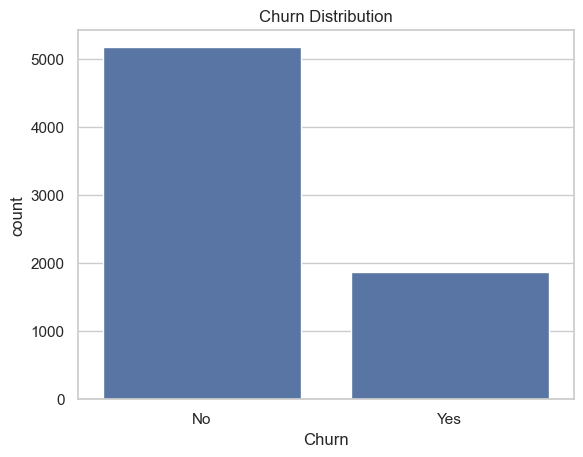

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of churn vs retained
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Percentage
print(data['Churn'].value_counts(normalize=True) * 100)


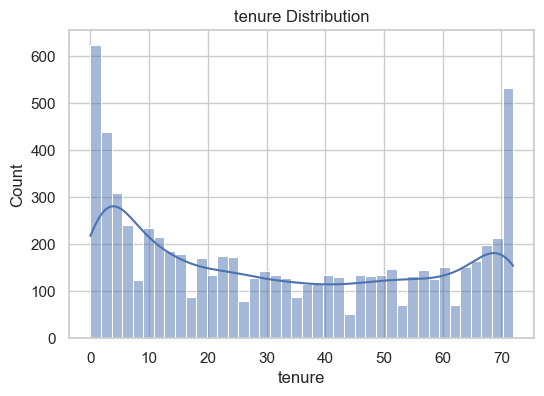

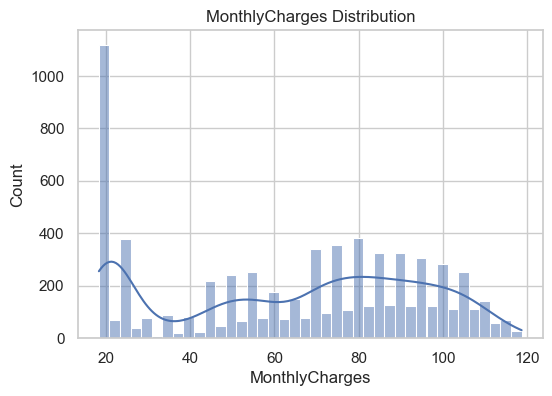

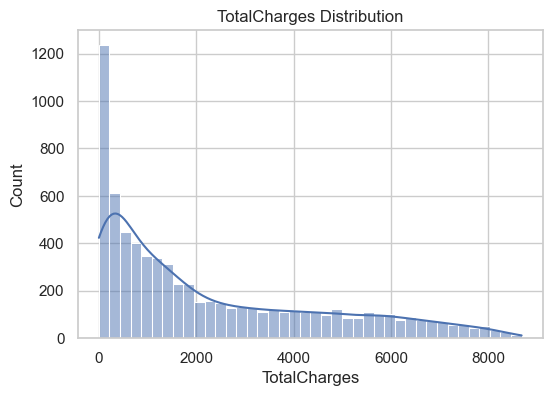

In [24]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=40, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()


In [25]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())



gender value counts:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner value counts:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents value counts:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService value counts:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines value counts:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService value counts:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity value counts:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup value counts:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection value counts:
DeviceProtection
No                     3

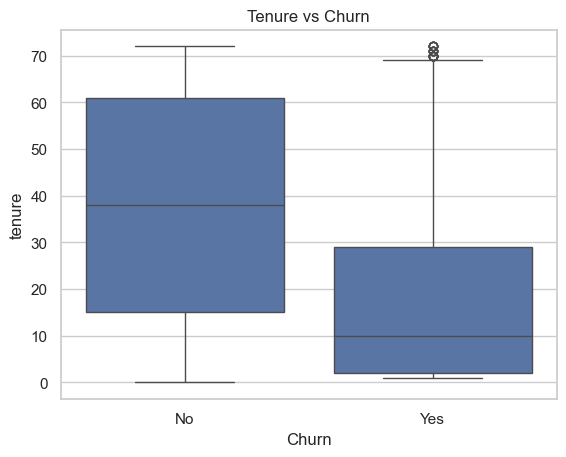

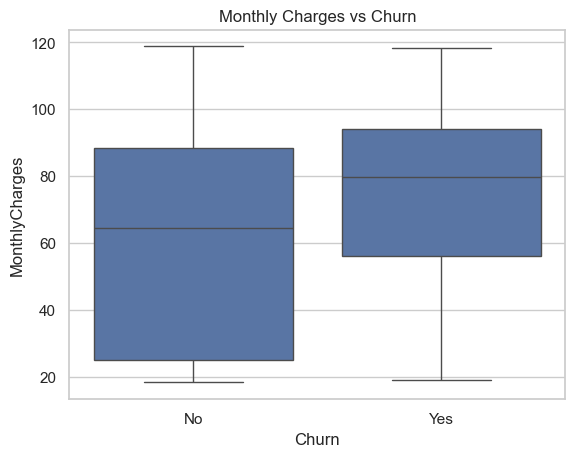

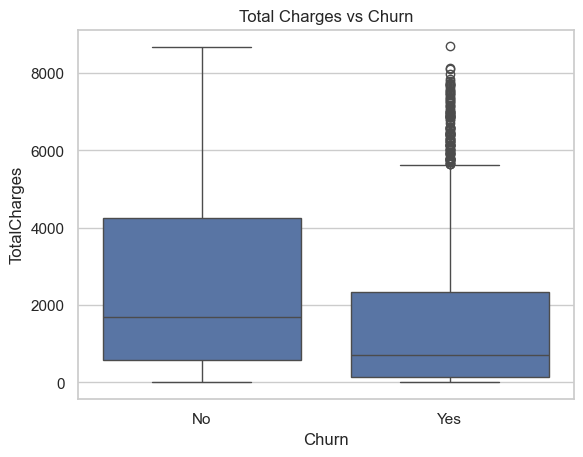

In [26]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Total Charges vs Churn')
plt.show()


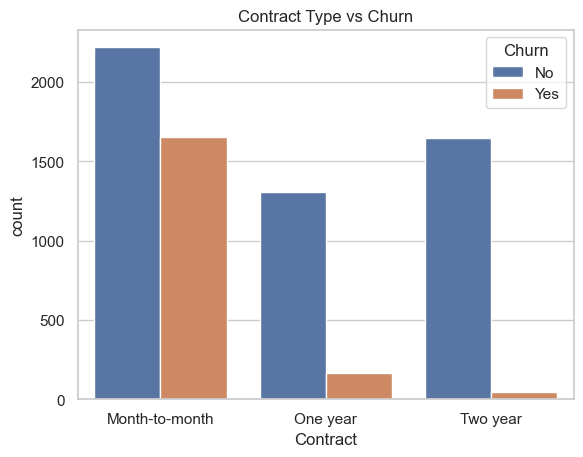

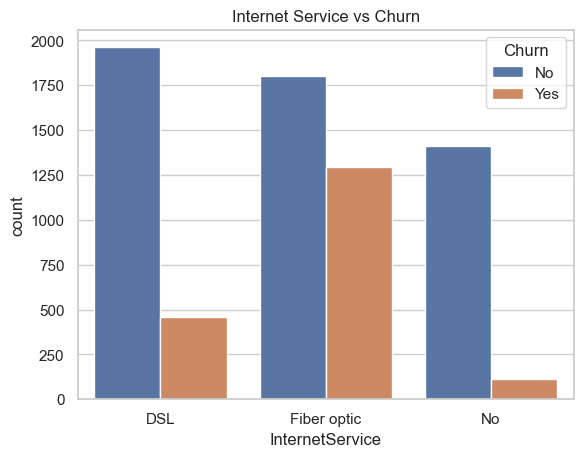

In [27]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Type vs Churn')
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Internet Service vs Churn')
plt.show()


### EDA Insights

1. Churned customers are ~26% of the dataset — target is imbalanced.  
2. Shorter tenure customers are more likely to churn.  
3. Higher MonthlyCharges may increase churn probability.  
4. Contract type and Internet service type influence churn.  
5. TotalCharges is strongly correlated with tenure.  
6. These insights will guide feature engineering for segmentation and churn modeling.
